In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install pyspellchecker

!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 34.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 32.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 33.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 116.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 76.5 MB/s eta 0:00:00


In [4]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.util import bigrams
from nltk.tokenize import word_tokenize
import transformers
from spellchecker import SpellChecker

In [5]:
df_orig = pd.read_excel("/content/drive/My Drive/datafile.xlsx")
df_orig = df_orig.rename(columns={'Q9_Loneliness_Meaning_Qual': 'survey'})

In [6]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.util import bigrams, trigrams
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [7]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [8]:
import pandas as pd

#Assuming df_orig is your original DataFrame
df_sampled = df_orig

In [9]:
df_sampled

,Idme,gender,groupedage,age,UCLA3itemscale,survey
0,203,2.0,2.0,16.0,8.0,-99
1,237,2.0,2.0,16.0,9.0,Makes me feel empty
2,545,2.0,2.0,16.0,6.0,Not speaking to anyone for days. Being out wit...
3,565,1.0,2.0,16.0,8.0,I am a very loving generous person but due to ...
4,658,2.0,2.0,16.0,9.0,Unlikeable
...,...,...,...,...,...,...
55198,55227,NaN,3.0,NaN,NaN,-99
55199,55228,NaN,3.0,NaN,NaN,-99
55200,55229,NaN,5.0,NaN,NaN,-99
55201,55230,NaN,NaN,NaN,NaN,-99


In [10]:
# Cleaning function
def clean_text(df, column_name='survey'):
    df['clean_text'] = df[column_name].astype(str).str.lower()
    df['clean_text'] = df['clean_text'].str.replace(r'\d+|-', '', regex=True)
    df['clean_text'] = df['clean_text'].str.replace(r'[^\w\s]', '', regex=True)
    return df

# Define lemmatization function without POS tagging
lemmatizer = WordNetLemmatizer()

def basic_lemmatize(text):
    tokens = word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(lemmatized_tokens)

# Remove stopwords
stopwords_list = set(stopwords.words('english'))

# Add additional stopwords
additional_stopwords = ['solitude', 'isolation', 'seclusion', 'desolation', 'abandonment',
                       'emptiness', 'alienation', 'forsakenness', 'aloneness', 'withdrawal',
                       'loneliness', 'lonely','alone', 'one', 'feeling', 'isolated']

stopwords_list.update(additional_stopwords)

def remove_stopwords(text):
    words = word_tokenize(text)
    return ' '.join([word for word in words if word not in stopwords_list])

def get_bigrams(text):
    tokens = word_tokenize(text)
    return list(bigrams(tokens))

def get_trigrams(text):
    tokens = word_tokenize(text)
    return list(trigrams(tokens))

# Applying the functions to the sampled dataframe df_sampled
df_sampled = clean_text(df_sampled)
df_sampled['lemmatized_text'] = df_sampled['clean_text'].apply(basic_lemmatize)
df_sampled['without_stopwords'] = df_sampled['lemmatized_text'].apply(remove_stopwords)
df_sampled['bigrams'] = df_sampled['without_stopwords'].apply(get_bigrams)
df_sampled['trigrams'] = df_sampled['without_stopwords'].apply(get_trigrams)

# Drop missing values
df_sampled.dropna(inplace=True)

# Display DataFrame shape, head, and counts of missing values and empty strings
print(df_sampled.shape)
print(df_sampled.head())
print(df_sampled.isna().sum())
print((df_sampled == '').sum())

# Filter out rows with empty strings in specified columns
df_sampled = df_sampled[df_sampled['clean_text'] != '']
df_sampled = df_sampled[df_sampled['lemmatized_text'] != '']
df_sampled = df_sampled[df_sampled['without_stopwords'] != '']
df_sampled = df_sampled[df_sampled['bigrams'].astype(str) != '[]']
df_sampled = df_sampled[df_sampled['trigrams'].astype(str) != '[]']

print(df_sampled.shape)

(45625, 11)
   Idme  gender  groupedage   age  UCLA3itemscale  \
0   203     2.0         2.0  16.0             8.0   
1   237     2.0         2.0  16.0             9.0   
2   545     2.0         2.0  16.0             6.0   
3   565     1.0         2.0  16.0             8.0   
4   658     2.0         2.0  16.0             9.0   

                                              survey  \
0                                                -99   
1                                Makes me feel empty   
2  Not speaking to anyone for days. Being out wit...   
3  I am a very loving generous person but due to ...   
4                                         Unlikeable   

                                          clean_text  \
0                                                      
1                                makes me feel empty   
2  not speaking to anyone for days being out with...   
3  i am a very loving generous person but due to ...   
4                                         unlikeable

In [11]:
value_counts = df_sampled['UCLA3itemscale'].value_counts()
print(value_counts)

6.0    7057
9.0    5244
7.0    4318
5.0    4263
3.0    3823
8.0    3492
4.0    3091
Name: UCLA3itemscale, dtype: int64


In [12]:
df_sampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31288 entries, 1 to 47377
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Idme               31288 non-null  int64  
 1   gender             31288 non-null  float64
 2   groupedage         31288 non-null  float64
 3   age                31288 non-null  float64
 4   UCLA3itemscale     31288 non-null  float64
 5   survey             31288 non-null  object 
 6   clean_text         31288 non-null  object 
 7   lemmatized_text    31288 non-null  object 
 8   without_stopwords  31288 non-null  object 
 9   bigrams            31288 non-null  object 
 10  trigrams           31288 non-null  object 
dtypes: float64(4), int64(1), object(6)
memory usage: 2.9+ MB


<ipython-input-13-bf1ec039bd01>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sampled['loneliness'] = df_sampled['UCLA3itemscale'].apply(lambda x: 'not lonely' if 3 <= x <= 5 else 'lonely')
<ipython-input-13-bf1ec039bd01>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sampled['age_group'] = df_sampled['age'].apply(categorize_age)
<ipython-input-13-bf1ec039bd01>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

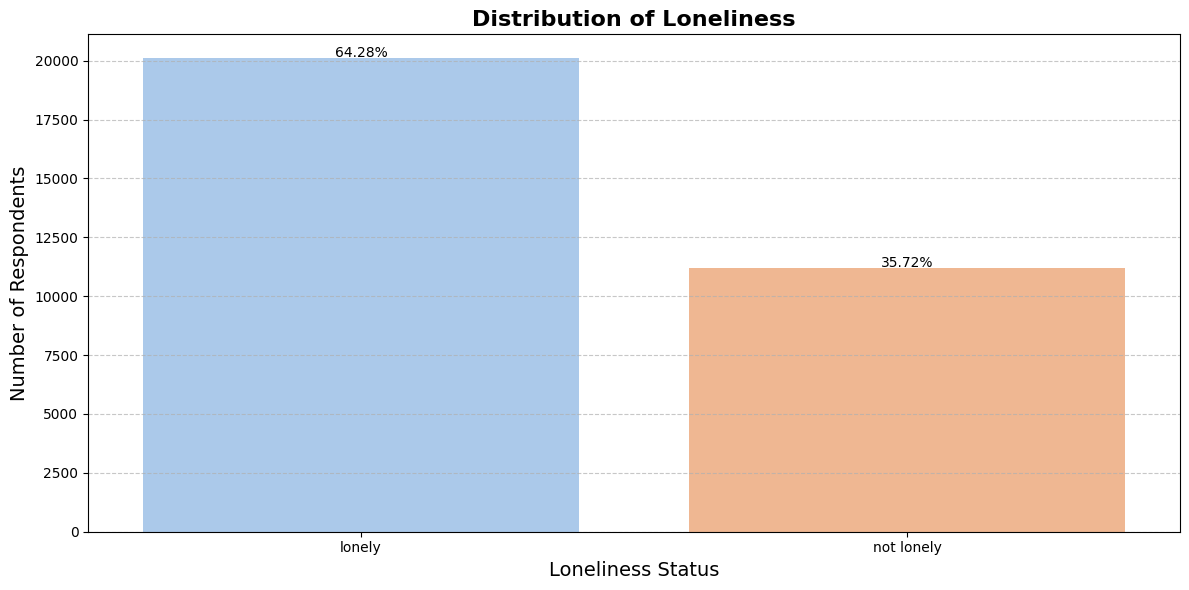

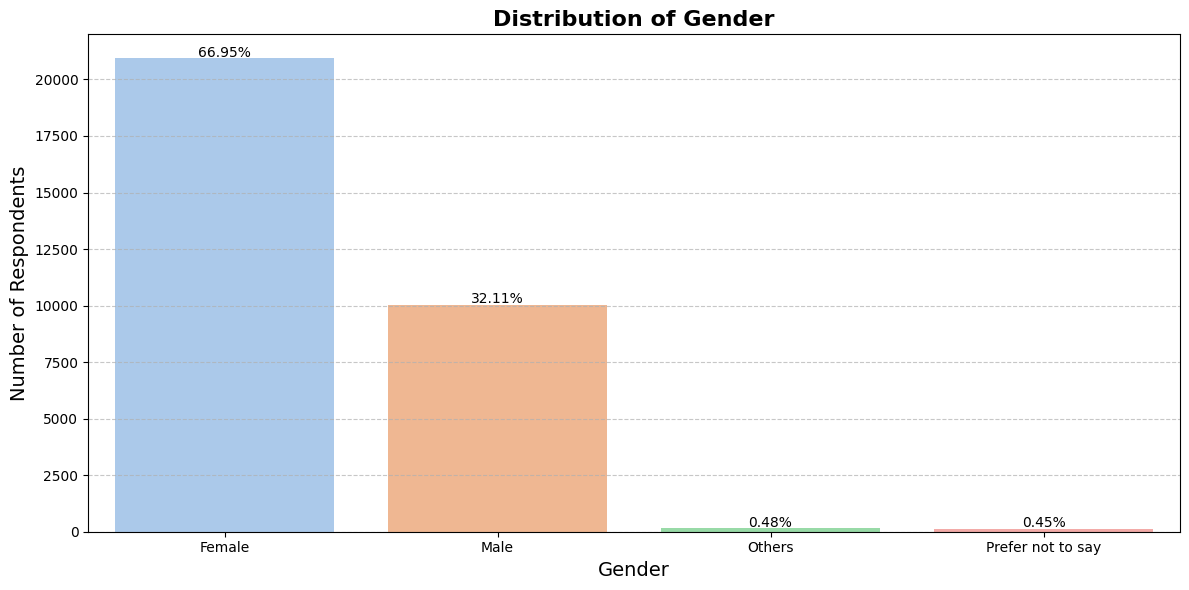

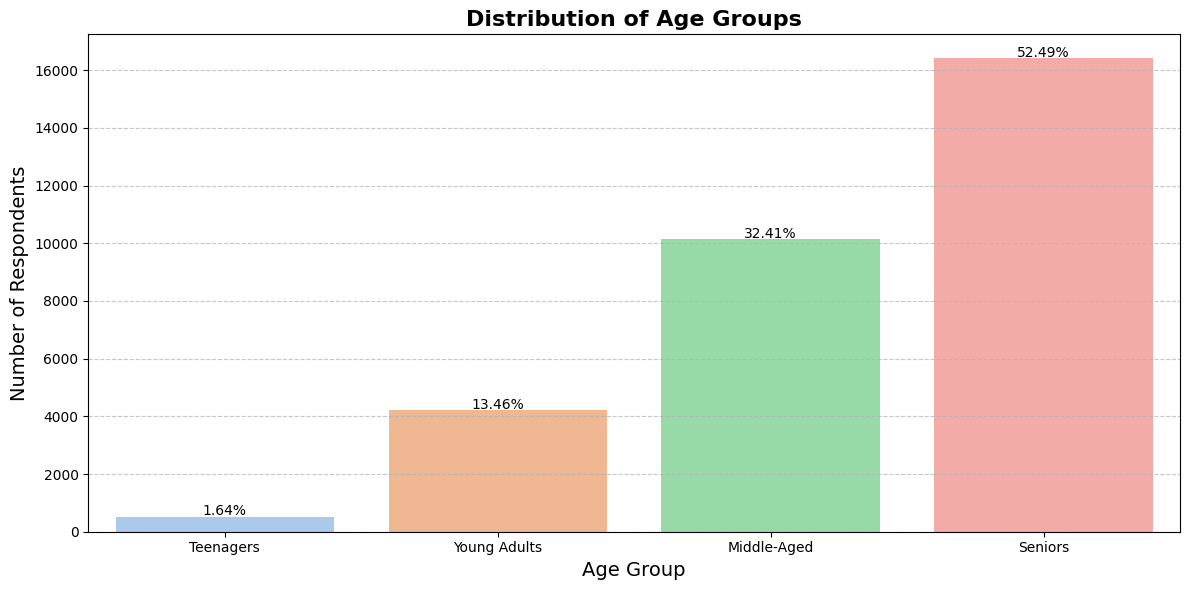

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you've already loaded your data into df_sampled
df_sampled['loneliness'] = df_sampled['UCLA3itemscale'].apply(lambda x: 'not lonely' if 3 <= x <= 5 else 'lonely')

def categorize_age(age):
    if age <= 18:
        return 'Teenagers'
    elif 19 <= age <= 30:
        return 'Young Adults'
    elif 31 <= age <= 50:
        return 'Middle-Aged'
    else:
        return 'Seniors'

df_sampled['age_group'] = df_sampled['age'].apply(categorize_age)

# Map gender values to their string representations
gender_map = {
    1: 'Male',
    2: 'Female',
    3: 'Others',
    4: 'Prefer not to say'
}
df_sampled['gender'] = df_sampled['gender'].map(gender_map)

# Function to annotate bars with percentage
def annotate_percentage(ax, total, fontsize=10):
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='center', fontsize=fontsize, color='black', xytext=(0, 5),
                    textcoords='offset points')

# Set a consistent color palette
sns.set_palette("pastel")

# Define a function to annotate percentages
def annotate_percentage(ax, total_count):
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width()/2.,
                height + 50,
                '{:1.2f}%'.format(100 * height/total_count),
                ha="center")

# Univariate Analysis
plt.figure(figsize=(12, 6))
ax1 = sns.countplot(data=df_sampled, x='loneliness')
annotate_percentage(ax1, len(df_sampled))
plt.title('Distribution of Loneliness', fontsize=16, fontweight='bold')
plt.xlabel('Loneliness Status', fontsize=14)
plt.ylabel('Number of Respondents', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
ax2 = sns.countplot(data=df_sampled, x='gender')
annotate_percentage(ax2, len(df_sampled))
plt.title('Distribution of Gender', fontsize=16, fontweight='bold')
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Number of Respondents', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
ax3 = sns.countplot(data=df_sampled, x='age_group', order=["Teenagers", "Young Adults", "Middle-Aged", "Seniors"])
annotate_percentage(ax3, len(df_sampled))
plt.title('Distribution of Age Groups', fontsize=16, fontweight='bold')
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Number of Respondents', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

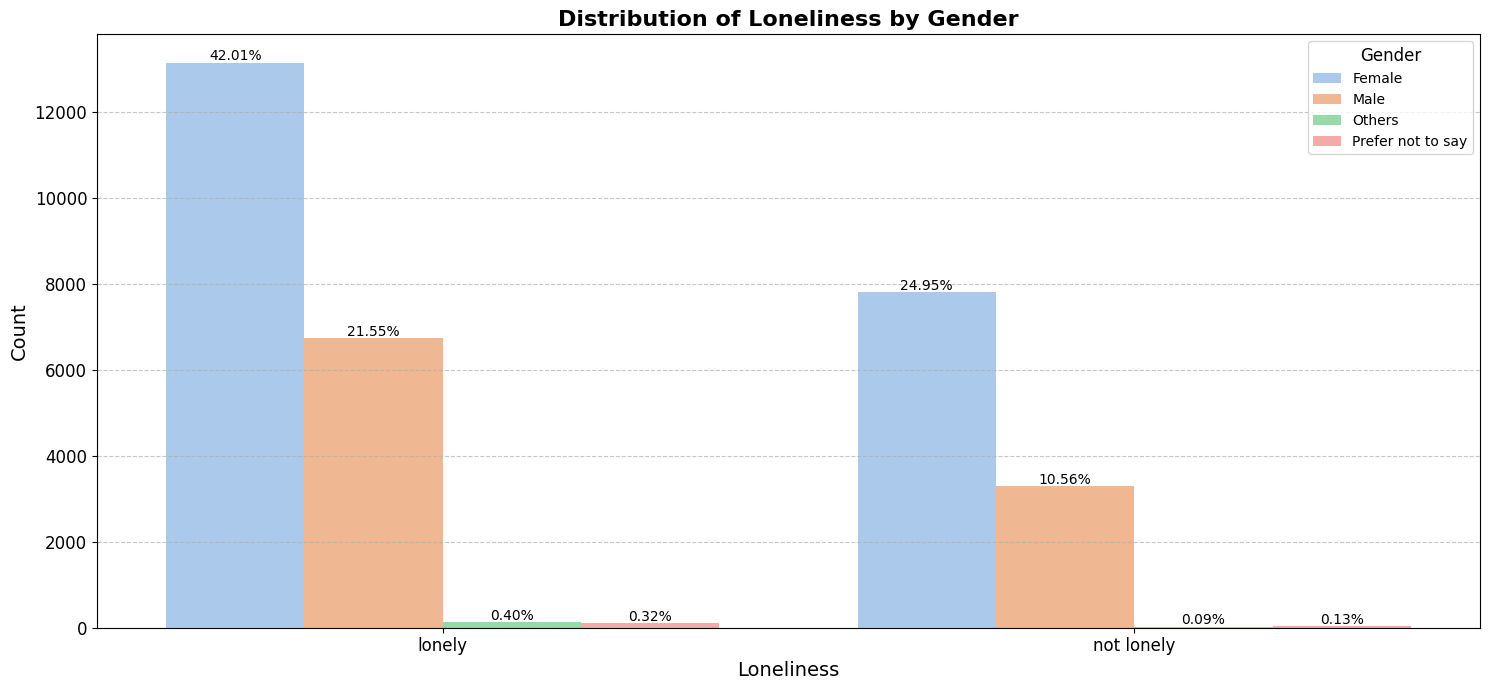

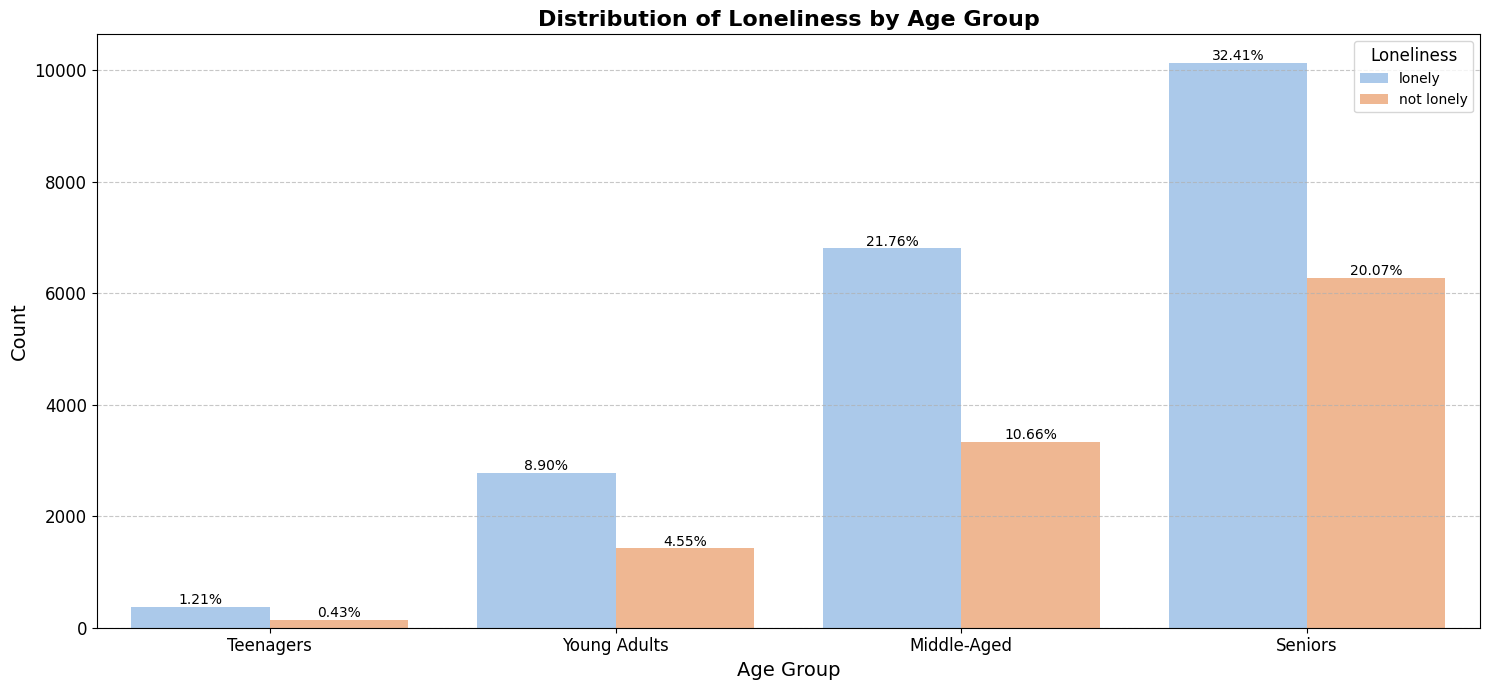

In [14]:
# Set the consistent "pastel" color palette
sns.set_palette("pastel")

# Distribution of Loneliness by Gender
plt.figure(figsize=(15, 7))
ax4 = sns.countplot(data=df_sampled, x='loneliness', hue='gender')
annotate_percentage(ax4, len(df_sampled))
plt.title('Distribution of Loneliness by Gender', fontsize=16, fontweight='bold')
plt.xlabel('Loneliness', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(loc='upper right', title='Gender', fontsize='medium', title_fontsize='large')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Distribution of Loneliness by Age Group
plt.figure(figsize=(15, 7))
ax5 = sns.countplot(data=df_sampled, x='age_group', hue='loneliness', order=['Teenagers', 'Young Adults', 'Middle-Aged', 'Seniors'])
annotate_percentage(ax5, len(df_sampled))
plt.title('Distribution of Loneliness by Age Group', fontsize=16, fontweight='bold')
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(loc='upper right', title='Loneliness', fontsize='medium', title_fontsize='large')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


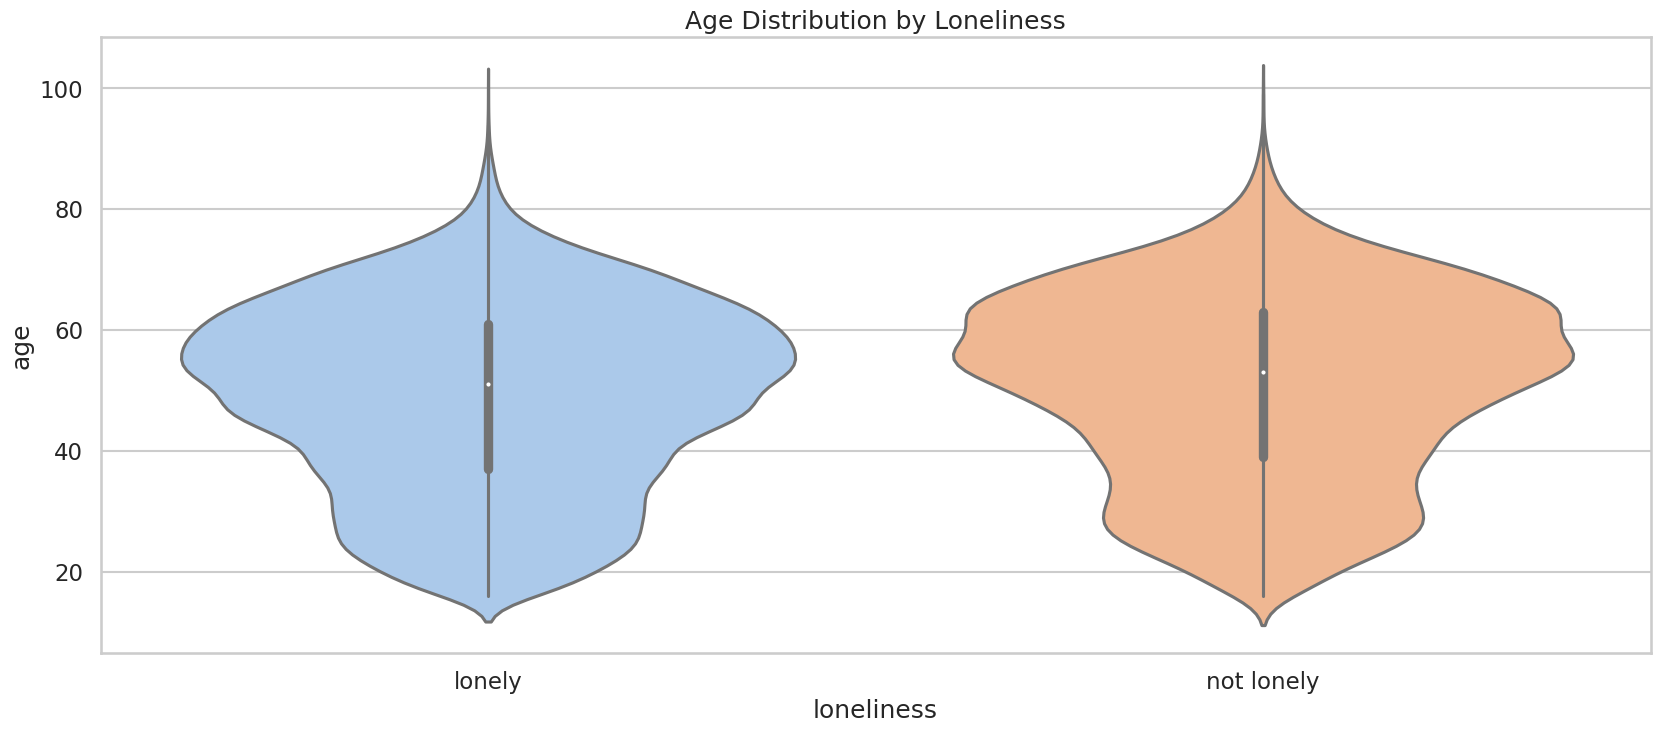

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

# Assuming df_sampled is already loaded and processed

# Set Seaborn style and context
sns.set_style("whitegrid")
sns.set_context("talk")

# 1. Age Distribution by Loneliness
plt.figure(figsize=(20, 8))
sns.violinplot(data=df_sampled, x='loneliness', y='age')
plt.title('Age Distribution by Loneliness')
plt.show()

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Assuming df_sampled is already loaded and processed
# Convert UCLA3itemscale to binary: 3-5 as not lonely (0) and 6-9 as lonely (1)
df_sampled['lonely'] = df_sampled['UCLA3itemscale'].apply(lambda x: 0 if 3 <= x <= 5 else 1)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df_sampled['clean_text'], df_sampled['lonely'], test_size=0.2, random_state=42)

# Convert text data into TF-IDF vectors
tfidf = TfidfVectorizer(max_features=5000)  # Using 5000 most frequent words
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Train a Logistic Regression model
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_tfidf, y_train)

# Predict and evaluate on test set
y_pred = clf.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.6307126877596676
              precision    recall  f1-score   support

           0       0.35      0.03      0.06      2247
           1       0.64      0.96      0.77      4011

    accuracy                           0.63      6258
   macro avg       0.50      0.50      0.42      6258
weighted avg       0.54      0.63      0.52      6258



In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert lemmatized_text into TF-IDF vectors
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Using 5000 most frequent words
X = tfidf_vectorizer.fit_transform(df_sampled['lemmatized_text'])
y = df_sampled['lonely']  # Assuming 'lonely' is the binary classification of the UCLA3itemscale

Evaluation metrics for Logistic Regression:
Accuracy: 0.6311920741450943
Precision: 0.6408602150537634
Recall: 0.9658439291947145
F1 Score: 0.7704852824184567
ROC AUC Score: 0.4998334020695424
Confusion Matrix:
 [[  76 2171]
 [ 137 3874]]
--------------------------------------------------
Evaluation metrics for Random Forest:
Accuracy: 0.6268775966762544
Precision: 0.6387417218543047
Recall: 0.9618548990276738
F1 Score: 0.7676848074818425
ROC AUC Score: 0.4953911789308374
Confusion Matrix:
 [[  65 2182]
 [ 153 3858]]
--------------------------------------------------
Evaluation metrics for Gradient Boosting:
Accuracy: 0.6395014381591563
Precision: 0.640737770649559
Recall: 0.9960109698329593
F1 Score: 0.779816513761468
ROC AUC Score: 0.49956311731523356
Confusion Matrix:
 [[   7 2240]
 [  16 3995]]
--------------------------------------------------
Cross-validation scores for Logistic Regression: [0.63119207 0.63342921 0.62975391 0.62649832 0.63145277]
---------------------------------

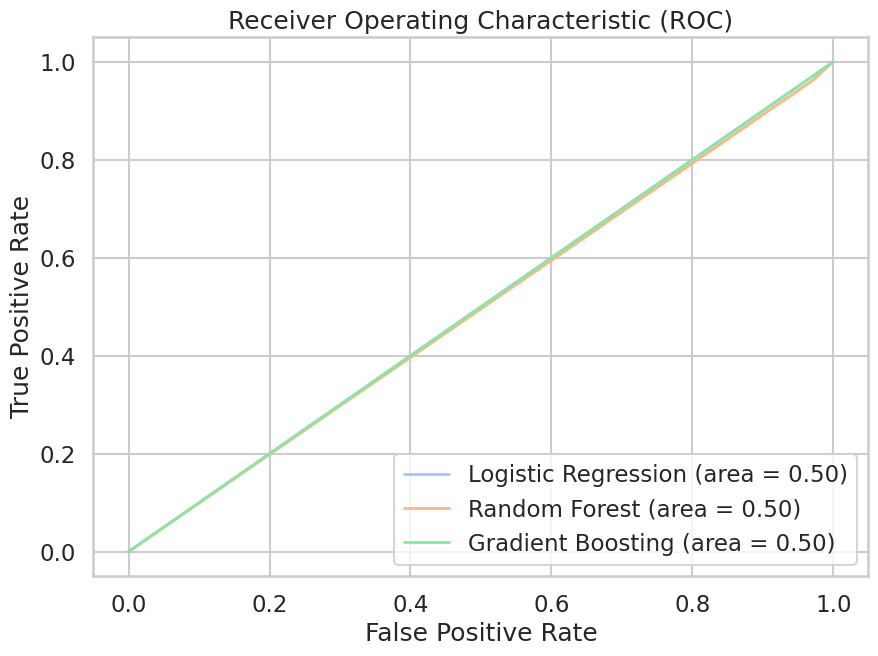

In [18]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Assuming df_sampled is your DataFrame

# 1. Vectorizing the Data
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X = tfidf_vectorizer.fit_transform(df_sampled['lemmatized_text'])
y = df_sampled['lonely']

# 2. Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Modeling

# Baseline Model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

# Advanced Models
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

gbm = GradientBoostingClassifier()
gbm.fit(X_train, y_train)
y_pred_gbm = gbm.predict(X_test)

#svm = SVC(probability=True)
#svm.fit(X_train, y_train)
#y_pred_svm = svm.predict(X_test)

# 4. Evaluation

# Metrics
models = [logreg, rf, gbm]
predictions = [y_pred_logreg, y_pred_rf, y_pred_gbm]
model_names = ["Logistic Regression", "Random Forest", "Gradient Boosting"]

for i, model in enumerate(models):
    print(f"Evaluation metrics for {model_names[i]}:")
    print("Accuracy:", accuracy_score(y_test, predictions[i]))
    print("Precision:", precision_score(y_test, predictions[i]))
    print("Recall:", recall_score(y_test, predictions[i]))
    print("F1 Score:", f1_score(y_test, predictions[i]))
    print("ROC AUC Score:", roc_auc_score(y_test, predictions[i]))
    print("Confusion Matrix:\n", confusion_matrix(y_test, predictions[i]))
    print("-" * 50)

# Cross-Validation
for i, model in enumerate(models):
    scores = cross_val_score(model, X, y, cv=5)
    print(f"Cross-validation scores for {model_names[i]}: {scores}")
    print("-" * 50)

# ROC Curves
plt.figure(figsize=(10, 7))
for i, model in enumerate(models):
    fpr, tpr, _ = roc_curve(y_test, predictions[i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{model_names[i]} (area = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

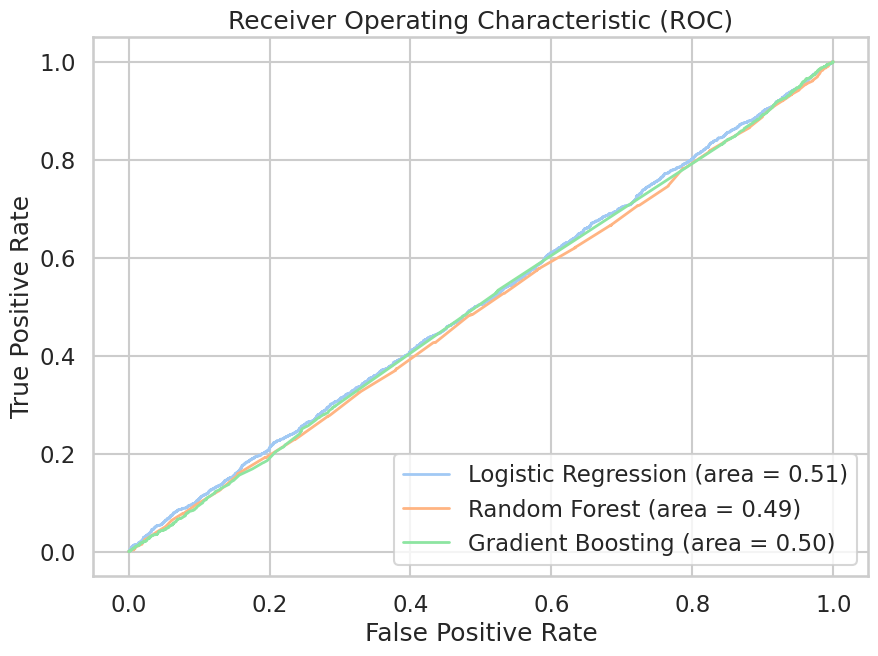

In [19]:
# ROC Curves
plt.figure(figsize=(10, 7))

# Getting predicted probabilities for each model
y_prob_logreg = logreg.predict_proba(X_test)[:, 1]
y_prob_rf = rf.predict_proba(X_test)[:, 1]
y_prob_gbm = gbm.predict_proba(X_test)[:, 1]
probs = [y_prob_logreg, y_prob_rf, y_prob_gbm]

for i, prob in enumerate(probs):
    fpr, tpr, _ = roc_curve(y_test, prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{model_names[i]} (area = {roc_auc:.2f})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


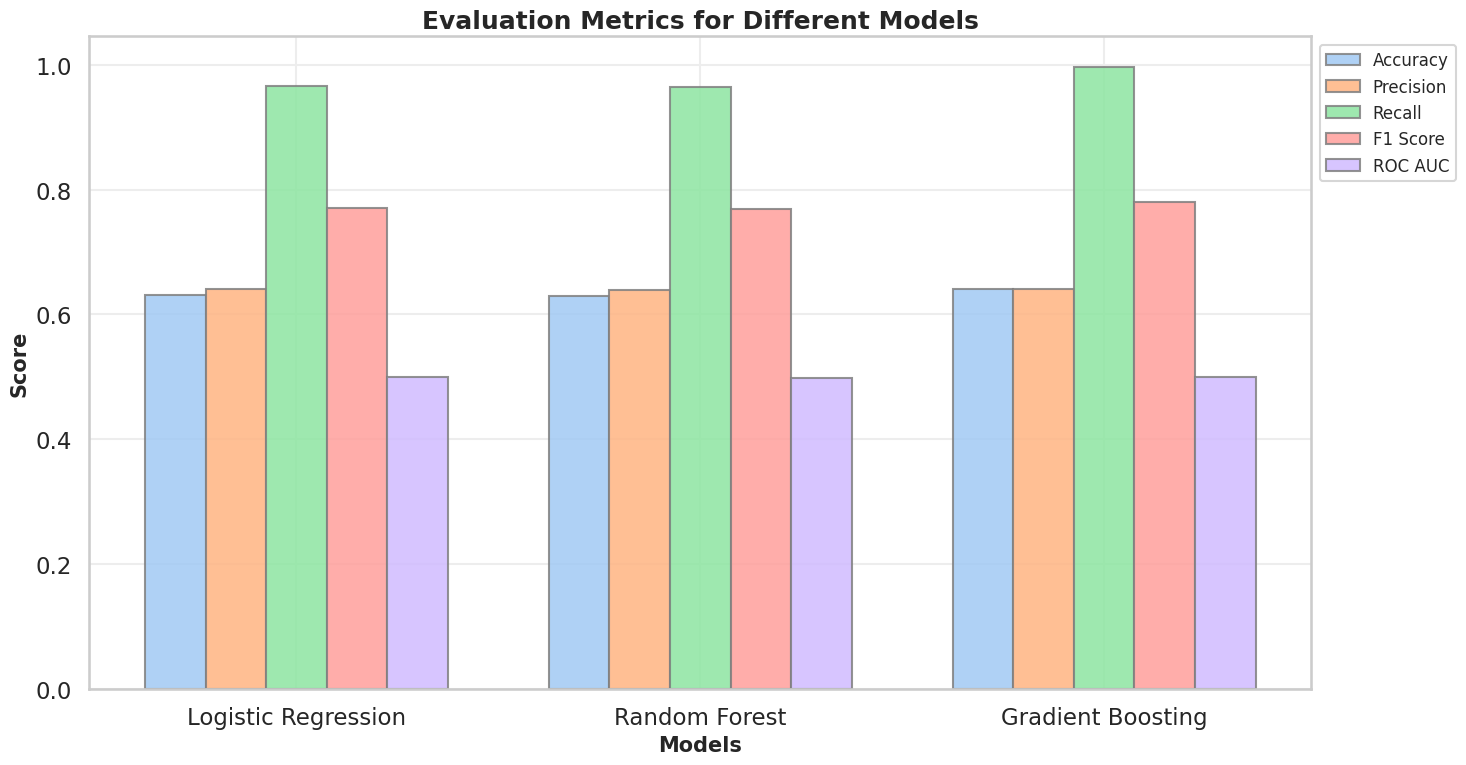

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Data
models = ['Logistic Regression', 'Random Forest', 'Gradient Boosting']
accuracy = [0.6311920741450943, 0.6292745286033876, 0.6401406200063918]
precision = [0.6408602150537634, 0.640006623613181, 0.6411944132284476]
recall = [0.9658439291947145, 0.9636000997257542, 0.9957616554475193]
f1_score = [0.7704852824184567, 0.7691542288557215, 0.7800781250000001]
roc_auc = [0.4998334020695424, 0.49804393059273916, 0.5005510546930519]

# Bar chart settings
barWidth = 0.15
r1 = np.arange(len(accuracy))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]

# Set consistent color palette and style
sns.set_palette("pastel")
sns.set_style("whitegrid", {'axes.grid.axis': 'y', 'grid.color': '.93'})

# Enhanced bar chart
plt.figure(figsize=(15, 8))
plt.bar(r1, accuracy, width=barWidth, label='Accuracy', edgecolor='grey', alpha=0.85)
plt.bar(r2, precision, width=barWidth, label='Precision', edgecolor='grey', alpha=0.85)
plt.bar(r3, recall, width=barWidth, label='Recall', edgecolor='grey', alpha=0.85)
plt.bar(r4, f1_score, width=barWidth, label='F1 Score', edgecolor='grey', alpha=0.85)
plt.bar(r5, roc_auc, width=barWidth, label='ROC AUC', edgecolor='grey', alpha=0.85)

# Enhancements for labels, title, and ticks
plt.xlabel('Models', fontweight='bold', fontsize=15)
plt.ylabel('Score', fontweight='bold', fontsize=15)
plt.xticks([r + barWidth*2 for r in range(len(accuracy))], models)
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1, fontsize=12)
plt.title("Evaluation Metrics for Different Models", fontweight='bold', fontsize=18)

# Display the enhanced bar chart
plt.tight_layout()
plt.show()


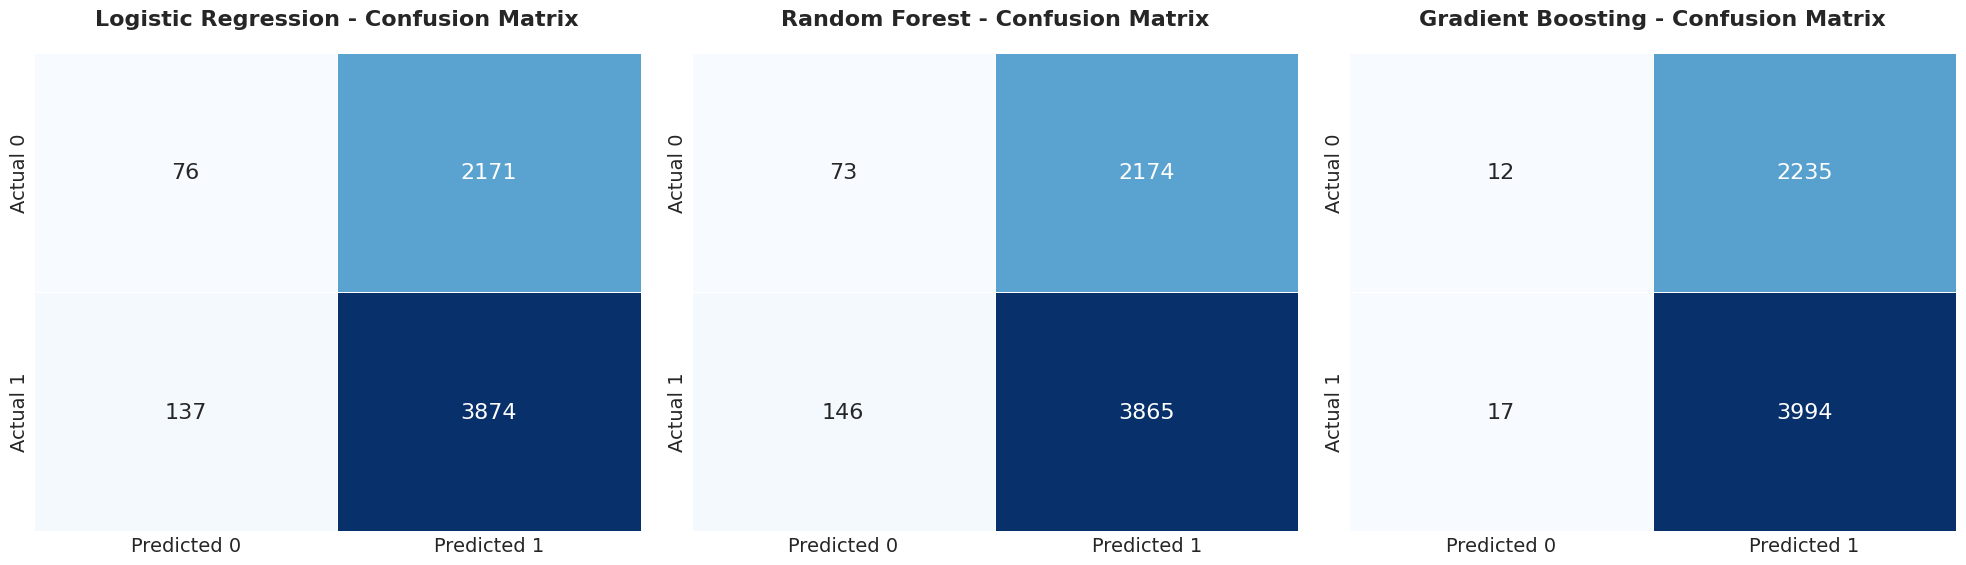

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data for confusion matrices
cm_logistic_regression = [[76, 2171], [137, 3874]]
cm_random_forest = [[73, 2174], [146, 3865]]
cm_gradient_boosting = [[12, 2235], [17, 3994]]
cms = [cm_logistic_regression, cm_random_forest, cm_gradient_boosting]
models = ['Logistic Regression', 'Random Forest', 'Gradient Boosting']

# Set consistent color palette and style
sns.set_palette("pastel")
sns.set_style("whitegrid", {'axes.grid': False})

# Enhanced heatmaps visualization
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))
for i, (cm, model) in enumerate(zip(cms, models)):
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes[i], cbar=False, linewidths=.5, annot_kws={"size": 16})
    axes[i].set_title(model + " - Confusion Matrix", fontweight='bold', fontsize=16, pad=20)
    axes[i].set_xticklabels(['Predicted 0', 'Predicted 1'], fontsize=14)
    axes[i].set_yticklabels(['Actual 0', 'Actual 1'], fontsize=14, va='center')
    axes[i].set_ylim(2,0)
    axes[i].tick_params(axis='y', which='both', length=0)
    axes[i].tick_params(axis='x', which='both', length=0)

plt.tight_layout()
plt.show()
